In [1]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors
from importlib import reload
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
importlib.reload(lpfet)

<module 'lpfet' from '/mnt/c/Users/tinc9/Documents/CNRS-offline/quantum_main_project/LPFET/lpfet.py'>

# 6 site ring with 2 atoms on opposite site

```
  o -- o
 /      \
x        x   
 \      /
  o -- o
  
```
Potential on sites are +i for o and -i for x

# Reset of Hxc potential each cycle

In [15]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object("_6ring2sites_v2")
    first = False
    print('\n', i, round(100 * i/max(x), 2), end='\n')
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 5}, 1: {'v': pmv, 'U': 5}, 2: {'v': pmv, 'U': 5}, 3: {'v': -pmv, 'U': 5},
         4: {'v': pmv, 'U': 5}, 5: {'v': pmv, 'U': 5}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    print(mol1.v_hxc)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, mol_fci, energy =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 0.05 2.44
Loop 0, Loop 1, Loop 2, [2.12604774 2.04235985 2.04235985 2.12604774 2.04235985 2.04235985]
FCI densities (per spin): [0.50284293 0.49857853 0.49857853 0.50284293 0.49857853 0.49857853]
Eigenvalue energy: -2.9882752373153703, calculated from contributions: -2.9882752373153703

 0.25 12.2
Loop 0, Loop 1, Loop 2, [2.36511913 1.92759955 1.92759955 2.36511913 1.92759955 1.92759955]
FCI densities (per spin): [0.51434351 0.49282824 0.49282824 0.51434351 0.49282824 0.49282824]
Eigenvalue energy: -2.6019831253102463, calculated from contributions: -2.6019831253102463

 0.45 21.95
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, [3.10086606 2.07220659 2.07220659 3.10086606 2.07220659 2.07220659]
FCI densities (per spin): [0.52636282 0.48681859 0.48681859 0.52636282 0.48681859 0.48681859]
Eigenvalue energy: -2.234450917776486, calculated from contributions: -2.234450917776486

 0.6500000000000001 31.

In [12]:
# for i in range(len(y)):
#     y[i] = np.array(y[i], dtype=float)
# y = np.array(y)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

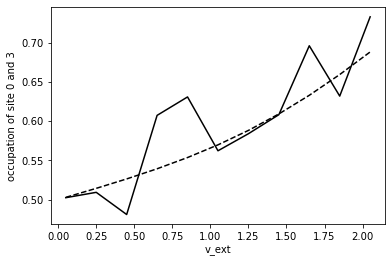

In [13]:
plt.plot(x, y_simple[:, 0], color='k')
plt.plot(x, y_ref[:, 0], c='k', linestyle='dashed')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.savefig('results/6ring2_v5/occupation(v_ext).png', dpi=150)

array([3.50758847, 1.11285316, 1.11285316, 3.50758847, 1.11285316,
       1.11285316])

In [ ]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))


for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color='#a7a7a7')

plt.plot(x, y_simple[:, 0],  c='k')
plt.plot(x, y_ref[:, 0],  c='k', linestyle='dashed')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.savefig('results/6ring2_v5/occupation(v_ext)_oscillation.png', dpi=150)
plt.show()

In [ ]:
norm = mpl.colors.Normalize(vmin=-0.05,  vmax=2.1)

for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    plt.plot(regime[:,0], color=mpl.cm.viridis(norm(mu_ext)) )

plt.xlabel("Iteration number")
plt.ylabel("occupation")
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.savefig('results/6ring2_v5/occupation(iter)_oscillations.png', dpi=150)

# Not reseting external potential

In [ ]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
for i in x:
    mol1.density_progress = []
    print('\n', i, round(100 * i/max(x), 2), end='\n')
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    

In [ ]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y = np.array(y)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

In [ ]:
plt.plot(x, y_simple[:, 0], color='k')
plt.plot(x, y_ref[:, 0], c='k', linestyle='dashed')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.savefig('results/6ring2_v5/occupation(v_ext)_transfer-potential.png', dpi=150)

In [ ]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))


for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color='#a7a7a7')

plt.plot(x, y_simple[:, 0],  c='k')
plt.plot(x, y_ref[:, 0],  c='k', linestyle='dashed')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")
plt.savefig('results/6ring2_v5/occupation(v_ext)_oscillation_transfer-potential.png', dpi=150)
plt.show()

In [ ]:
norm = mpl.colors.Normalize(vmin=-0.05,  vmax=2.1)

for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    plt.plot(regime[:,0], color=mpl.cm.viridis(norm(mu_ext)) )

plt.xlabel("Iteration number")
plt.ylabel("occupation")
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.savefig('results/6ring2_v5/occupation(iter)_oscillations_transfer-potential.png', dpi=150)

# Finding stability of convergence based on initial parameters of Hxc chemical potential

## v_ext = +- 1.0

In [52]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v3')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []
n_ref = []
iter_num = []
pmv = 1
first = True
for i in x:
    n.append([])
    n_ref.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_v2")
        first = False
        print(i, j, 100 * i/len(x))
        t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])
y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()

Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -0.8999999999999999 1.5000000000000004 -8.18181818181818
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -0.5999999999999999 -1.5 -5.454545454545453
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -0.5999999999999999 -1.2 -5.454545454545453
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -0.5999999999999999 -0.8999999999999999 -5.454545454545453
Loop 0, Loop 1, Loop 2, Loop 3, -0.5999999999999999 -0.5999999999999999 -5.454545454545453
Loop 0, Loop 1, Loop 2, -0.5999999999999999 -0.2999999999999998 -5.454545454545453
Loop 0, Loop 1, -0.599

' '

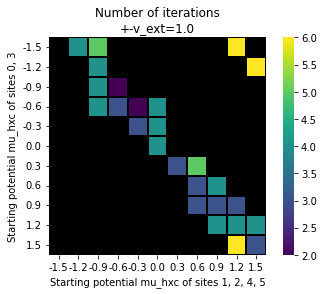

In [53]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
ax.set_facecolor('k')
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_iter-num_vext-1.png', dpi=150)
' '


' '

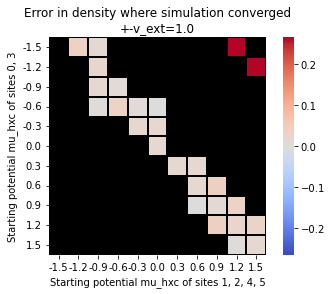

In [54]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref[0]
# essentials.print_matrix(n_array-n_ref[0])
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
ax.set_facecolor('k')
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_error-broad_vext-1.png', dpi=150)

' '

' '

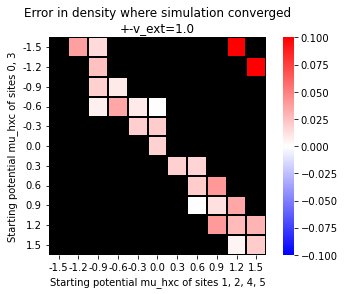

In [55]:

fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.1));
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_error-narrow_vext-1.png', dpi=150)
' '

# Seeing how simulation converges

In [19]:
v_hxc_range = np.arange(0, 4, 0.25)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
hxc_change_list = []
for v_hxc_1 in v_hxc_range:
    for v_hxc_2 in v_hxc_range:
        if not first:
            mol1.clear_object("_6ring2sites_v2")
        first = False
        print(v_hxc_1, v_hxc_2, end='\n')
        mol1.v_hxc[0] = mol1.v_hxc[3] = v_hxc_1
        mol1.v_hxc[1] = mol1.v_hxc[2] = mol1.v_hxc[4] = mol1.v_hxc[5] = v_hxc_2
        pmv = 0.75
        t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
        hxc_change_list.append([(v_hxc_1,v_hxc_2), (mol1.v_hxc[0], mol1.v_hxc[1])])
        y.append(mol1.density_progress)
        # y_simple.append(mol1.n_ks)
        # y_ab, mol_fci, energy =mol1.compare_densities_FCI(pass_object=mol_full)
        # y_ref.append(y_ab.diagonal())



	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, Loop 3, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 100.0
Loop 0, Loop 1, Loop 2, 
 2.05 10

(0.0, 3.0)

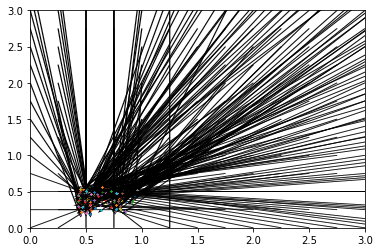

In [36]:
for start, stop in hxc_change_list:
    plt.arrow(start[0], start[1], stop[0] - start[0], stop[1]-start[1], lw=0.1, width=0.01, color='k')
    plt.scatter(stop[0], stop[1], marker='x', s=2)
plt.xlim(0, 3)
plt.ylim(0, 3)

Y values:


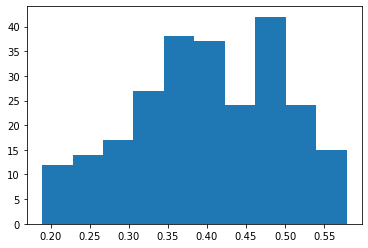

In [43]:
plt.hist([i[1][1] for i in hxc_change_list if i[1][1]>0 and i[1][1]<2])
print('Y values:')

x values:


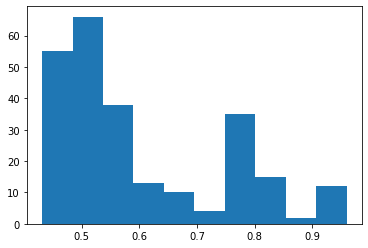

In [44]:
plt.hist([i[1][0] for i in hxc_change_list if i[1][1]>0 and i[1][1]<2])
print('x values:')

In [83]:
reload(lpfet)
v_hxc_range = np.arange(0, 4, 0.25)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
l_e = []
first = True
hxc_change_list = []
for v_hxc_1 in np.linspace(0.4, 1, 10):
    l_e_temp = []
    for v_hxc_2 in np.linspace(0.2, 1, 10):
        if not first:
            mol1.clear_object("_6ring2sites_v2")
        first = False
        print(v_hxc_1, v_hxc_2, end='\t\t')
        mol1.v_hxc[0] = mol1.v_hxc[3] = v_hxc_1
        mol1.v_hxc[1] = mol1.v_hxc[2] = mol1.v_hxc[4] = mol1.v_hxc[5] = v_hxc_2
        pmv = 0.75
        t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
        l_e_temp.append(mol1.calculate_energy(True))
        hxc_change_list.append([(v_hxc_1,v_hxc_2), (mol1.v_hxc[0], mol1.v_hxc[1])])
        y.append(mol1.density_progress)
        # y_simple.append(mol1.n_ks)
        # y_ab, mol_fci, energy =mol1.compare_densities_FCI(pass_object=mol_full)
        # y_ref.append(y_ab.diagonal())
    l_e.append(l_e_temp)



	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.4 0.2		Loop 0, Loop 1, Optimized v_hxc (0.0), Loop 2, Optimized v_hxc (0.0), Loop 3, Optimized v_hxc (0.0), Loop 4, Optimized v_hxc (0.0), Loop 5, Optimized v_hxc (0.0), Loop 6, Optimized v_hxc (0.0), Loop 7, Optimized v_hxc (0.0), Loop 8, Optimized v_hxc (0.0), Loop 9, Optimized v_hxc (0.0), Loop 10, Optimized v_hxc (0.0025187435253957533), Loop 11, Optimized v_hxc (0.002192577286765246), Loop 12, Loop 13, 0.4 0.2888888888888889		Loop 0, Loop 1, Optimized v_hxc (0.0), Loop 2, Optimized v_hxc (0.0), Loop 3, Optimized v_hxc (0.0), Loop 4, Optimized v_hxc (0.0), Loop 5, Optimized v_hxc (0.0), Loop 6, Optimized v_hxc (0.0), Loop 7, Optimized v_hxc (0.0), Loop 8, Optimized v_hxc (0.002431359482415916), Loop 9, Optimized v_hxc (0.002134131048008966), Loop 10, Optimized v_hxc (0.0019309094168284758), Loop 11, Optimized v_hxc (0.0017894492201283065), Loop 12, Loop 13, 0.4 0.37777777777777777		Loop 

Text(0, 0.5, 'Hxc potentnial on sites 1, 2, 4, 5')

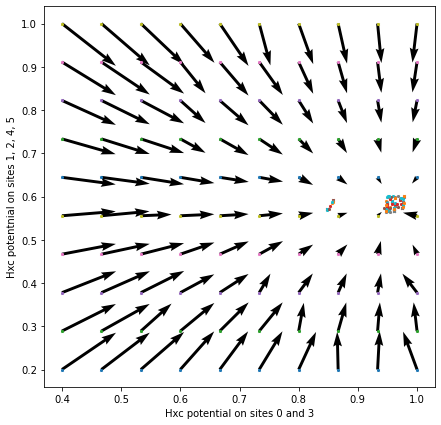

In [90]:
fig, ax = plt.subplots(figsize=(7,7))
for start, stop in hxc_change_list:
    lenx = stop[0] - start[0]
    leny = stop[1]-start[1]
    # norm = np.sqrt(lenx**2 + leny**2) * 10 + 1e-15
    # plt.arrow(start[0], start[1], lenx, leny, color='k')
    plt.quiver(start[0], start[1], lenx, leny, scale=4, color='k')
    plt.scatter(start[0], start[1], marker='x', s=5)
    plt.scatter(stop[0], stop[1], marker='x', s=5)
plt.xlabel('Hxc potential on sites 0 and 3')
plt.ylabel('Hxc potentnial on sites 1, 2, 4, 5')
# plt.xlim(0.9,1)
# plt.ylim(0.55, 0.62)

In [73]:
mol1.v_hxc_progress = np.array(mol1.v_hxc_progress)
mol1.v_hxc_progress[:, 0:2]

array([[1.        , 0.46388133],
       [0.80719171, 0.46388133],
       [0.90719171, 0.56388133],
       [0.95597254, 0.60064997],
       [0.87099344, 0.45775437],
       [0.97099344, 0.55775437],
       [0.86956432, 0.59748587],
       [0.96956432, 0.45127393],
       [0.84882729, 0.55127393],
       [0.94882729, 0.59030773],
       [0.99133387, 0.45647659],
       [0.85807374, 0.55647659],
       [0.95807374, 0.59427525],
       [0.87076455, 0.45743853],
       [0.97076455, 0.55743853],
       [0.8694116 , 0.59725114],
       [0.9694116 , 0.45124727],
       [0.84876463, 0.55124727],
       [0.94876463, 0.59028712],
       [0.99128155, 0.45647057]])

In [76]:
for i in range(19):
    a = np.average(np.square(mol1.v_hxc_progress[i] - mol1.v_hxc_progress[i+1]))
    print(a, a>0.05, a>0.005, a>0.001)

0.012391678407272434 False True True
0.010000000000000004 False True True
0.0016944782611744288 False False True
0.01601991882350301 False True True
0.009999999999999995 False True True
0.004481683351226757 False False True
0.017585287506966 False True True
0.011525809775121278 False True True
0.004349092094527357 False False True
0.01254278607816725 False True True
0.012586087466526489 False True True
0.004285825690045826 False False True
0.015023824445219663 False True True
0.009999999999999995 False True True
0.004480835841159035 False False True
0.017544752332556337 False True True
0.011518563729890212 False True True
0.004349406481990617 False False True
0.012540476211341004 False True True


<AxesSubplot:>

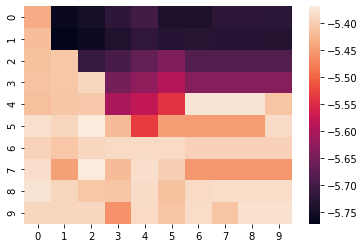

In [60]:
sns.heatmap(np.array(l_e))

In [53]:

reload(lpfet)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
v_hxc_1 = 0.60
v_hxc_2 = 0.35
mol1.clear_object("_6ring2sites_v2")
print(v_hxc_1, v_hxc_2, end='\t\t')
mol1.v_hxc[0] = mol1.v_hxc[3] = v_hxc_1
mol1.v_hxc[1] = mol1.v_hxc[2] = mol1.v_hxc[4] = mol1.v_hxc[5] = v_hxc_2
pmv = 0.75
t, v_ext, u = lpfet.generate_from_graph(
    {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
     4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
    {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
mol1.calculate_ks()
print('\nn_ks', mol1.n_ks)
print('v_hxc', mol1.v_hxc)


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.6 0.35		
n_ks [0.67764703 0.41117649 0.41117649 0.67764703 0.41117649 0.41117649]
v_hxc [0.6  0.35 0.35 0.6  0.35 0.35]


In [54]:
mol1.CASCI()
print(mol1.imp_potential)

[0.6  0.35 0.35 0.6  0.35 0.35]


In [55]:
print('\nn_ks', mol1.n_ks)
print('v_hxc', mol1.v_hxc)


n_ks [0.67764703 0.41117649 0.41117649 0.67764703 0.41117649 0.41117649]
v_hxc [0.63   0.3675 0.3675 0.63   0.3675 0.3675]


In [56]:
l1 = []
l_h_dimer = []
l_e = []
for v_hxc_1 in np.linspace(0, 3, 30):
    # v_hxc_1 = 0.60
    v_hxc_2 = 0.35
    mol1.clear_object("_6ring2sites_v2")
    print(v_hxc_1, v_hxc_2, end='  -->  ')
    mol1.v_hxc[0] = mol1.v_hxc[3] = v_hxc_1
    mol1.v_hxc[1] = mol1.v_hxc[2] = mol1.v_hxc[4] = mol1.v_hxc[5] = v_hxc_2
    pmv = 0.75
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.calculate_ks()
    mol1.CASCI(None)
    print(mol1.v_hxc[0], mol1.v_hxc[1], f'({mol1.v_hxc[0] - v_hxc_1}, {mol1.v_hxc[1] - v_hxc_2})')
    l1.append([v_hxc_1, v_hxc_2, mol1.v_hxc[0], mol1.v_hxc[1]])
    l_h_dimer.append(mol1.h_tilde_dimer[0])
    l_e.append(mol1.calculate_energy(True))
l1 = np.array(l1)
l_h_dimer = np.array(l_h_dimer)

0.0 0.35  -->  0.4364917320795585 0.3675 (0.4364917320795585, 0.017500000000000016)
0.10344827586206896 0.35  -->  0.484899741253013 0.3675 (0.38145146539094404, 0.017500000000000016)
0.20689655172413793 0.35  -->  0.5309933590427325 0.3675 (0.3240968073185946, 0.017500000000000016)
0.3103448275862069 0.35  -->  0.5748944606734242 0.3675 (0.2645496330872173, 0.017500000000000016)
0.41379310344827586 0.35  -->  0.4904518907348041 0.3675 (0.07665878728652825, 0.017500000000000016)
0.5172413793103449 0.35  -->  0.5431034482758621 0.3675 (0.025862068965517238, 0.017500000000000016)
0.6206896551724138 0.35  -->  0.6517241379310345 0.3675 (0.03103448275862064, 0.017500000000000016)
0.7241379310344828 0.35  -->  0.7603448275862069 0.3675 (0.036206896551724155, 0.017500000000000016)
0.8275862068965517 0.35  -->  0.8689655172413793 0.3675 (0.04137931034482756, 0.017500000000000016)
0.9310344827586207 0.35  -->  0.9233535345194406 0.3675 (-0.007680948239180085, 0.017500000000000016)
1.0344827586

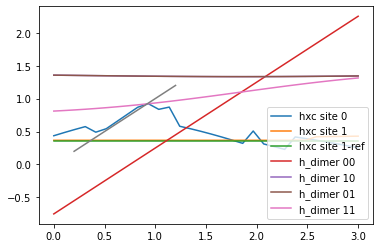

In [57]:
plt.plot(l1[:, 0], l1[:, 2], label='hxc site 0')
plt.plot(l1[:, 0], l1[:, 3], label='hxc site 1')
plt.plot(l1[:, 0], l1[:, 1], label='hxc site 1-ref')
plt.plot(l1[:, 0], l_h_dimer[:, 0, 0], label='h_dimer 00')
plt.plot(l1[:, 0], l_h_dimer[:, 1, 0], label='h_dimer 10')
plt.plot(l1[:, 0], l_h_dimer[:, 0, 1], label='h_dimer 01')
plt.plot(l1[:, 0], l_h_dimer[:, 1, 1], label='h_dimer 11')

plt.plot([0.2,1.2], [0.2,1.2])

plt.legend()

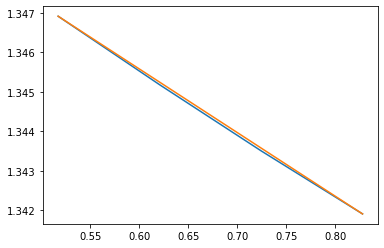

In [38]:
e0 = 1
e1 = 0
plt.plot(l1[5:9, 0], l_h_dimer[5:9, e0, e1], label='h_dimer 10')

plt.plot([l1[5,0], l1[8,0]], [l_h_dimer[5,e0,e1], l_h_dimer[8, e0,e1]])

array([[0.51724138, 0.35      , 0.51724138, 0.35      ],
       [0.62068966, 0.35      , 0.62068966, 0.35      ],
       [0.72413793, 0.35      , 0.72413793, 0.35      ],
       [0.82758621, 0.35      , 0.82758621, 0.35      ]])

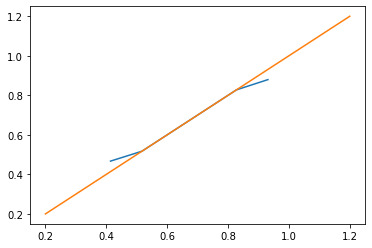

In [27]:
plt.plot(l1[4:10, 0], l1[4:10, 2], label='hxc site 0')
# 5-9

plt.plot([0.2,1.2], [0.2,1.2])
l1[5:9]

In [41]:
h_dimer_low = l_h_dimer[5]
h_dimer_high = l_h_dimer[9]
print(h_dimer_low, '\n', h_dimer_high)

[[-0.23275862  1.34691365]
 [ 1.34691365  0.86221579]] 
 [[0.18103448 1.34039994]
 [1.34039994 0.92197255]]


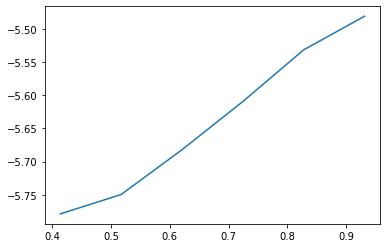

In [47]:
plt.plot(l1[4:10, 0], l_e[4:10])

# OLD CALCUALTIONS!!

## v_ext = +- 0.5

In [ ]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-0.5")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 0.5
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-0.5")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]

In [ ]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations - yellow means that maximum\n number of iterations has been reached (20)\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

In [ ]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

In [ ]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## v_ext = +- 2

In [ ]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-2")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 2
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-2")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]

In [ ]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

In [ ]:
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

In [ ]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## Conclussions
It looks like convergence and error of the algorithm is dependent primarily the **difference** on starting values of $v^{Hxc}$. \
It also looks like I can reduce dimensionality of this problem by only taking starting Hxc potential (-x, x, x, -x, x, x) \
From only 2 examples it looks like that for larger $\Delta v^{ext}$ there is higher optimal difference in starting Hxc chemical potentials.

# New way to adjust potential (hopefully)

## Comparison with the first experiment

## Testing for v_ext=1

In [57]:
lpfet.COMPENSATION_1_RATIO = 0.75
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_pot_adjustment_vext-1_6ring2sites_pot_adjustment_vext-1")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 1
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
mu_hxc_0 = []
mu_hxc_1 = []
for i_id, i in enumerate(x):
    n.append([])
    mu_hxc_0.append([])
    mu_hxc_1.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_pot_adjustment_vext-1_6ring2sites_pot_adjustment_vext-1")
        first = False
        print(f'\n ({i:.3f}, {j:.3f}, {100 * i_id/len(x):.0f}%): ', end=", ")
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001, oscillation_compensation=1))
        n[-1].append(mol1.n_ks[0])
        mu_hxc_0[-1].append(mol1.mu_hxc[0])
        mu_hxc_1[-1].append(mol1.mu_hxc[1])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

 (-1.500, -1.500, 0%): , Loop 0, Loop 1, -1.50->0.28->-0.86!=-1.24, -0.46->-0.75->-0.25!=-0.08, Loop 2, 0.28->-0.86->-0.16!=0.07, Loop 3, -0.86->-0.16->-0.77!=-0.97, -0.25->-0.52->-0.32!=-0.25, Loop 4, Loop 5, Loop 6, Loop 7, 
 (-1.500, -1.200, 0%): , Loop 0, Loop 1, Loop 2, Loop 3, 
 (-1.500, -0.900, 0%): , Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, 
 (-1.500, -0.600, 0%): , Loop 0, Loop 1, -0.14->-1.03->-0.31!=-0.07, -0.60->-0.22->-0.48!=-0.57, Loop 2, Loop 3, Loop 4, Loop 5, 
 (-1.500, -0.300, 0%): , Loop 0, Loop 1, 0.44->-1.36->0.10!=0.59, -0.98->-0.02->-0.87!=-1.15, Loop 2, -1.36->0.10->-0.91!=-1.25, -0.02->-0.87->-0.29!=-0.10, Loop 3, Loop 4, -0.91->-0.20->-0.77!=-0.97, -0.29->-0.54->-0.33!=-0.26, Loop 5, Loop 6, Loop 7, Loop 8, 
 (-1.500, 0.000, 0%): , Loop 0, Loop 1, 0.75->-2.00->0.69!=1.59, -1.27->0.10->-1.06!=-1.44, Loop 2, -2.00->0.69->-1.26!=-1.90, 0.10->-1.06->-0.24!=0.03, Loop 3, L

## Usual graphs new

' '

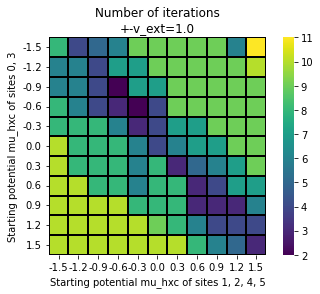

In [58]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
ax.set_facecolor('k')
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_iter-num_vext-1_COsc.png', dpi=150)
' '


' '

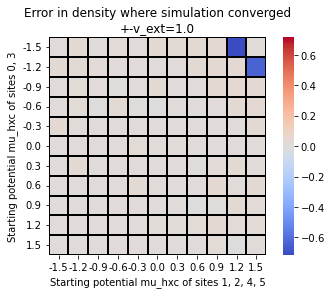

In [60]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
# essentials.print_matrix(n_array-n_ref[0])
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
ax.set_facecolor('k')
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_error-broad_vext-1_COsc.png', dpi=150)

' '

' '

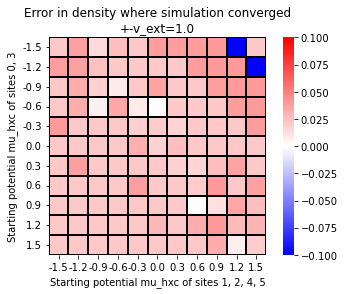

In [61]:

fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.1));
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
plt.savefig('results/6ring2_v5/changing-starting-hxc_error-narrow_vext-1_COsc.png', dpi=150)
' '

### Usual graphs

Result:  0.013226654316701692 +- 0.08989564420985209 (filtered out 0 outliers)


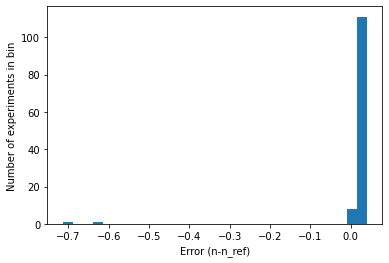

In [88]:
D1_diff_array = diff_array.flatten()
# D1_diff_array = [i for i in D1_diff_array if -0.2 < i < .2]
plt.hist(D1_diff_array, bins=30)
plt.xlabel('Error (n-n_ref)')
plt.ylabel('Number of experiments in bin')
print('Result: ', np.average(D1_diff_array), '+-', np.std(D1_diff_array), f'(filtered out {len(diff_array.flatten())-len(D1_diff_array)} outliers)')
plt.savefig('results/6ring2_v5/Histogram_all_vext-1_COsc.png', dpi=150)

Result:  0.024810997912068696 +- 0.008564859633802244 (filtered out 2 outliers)


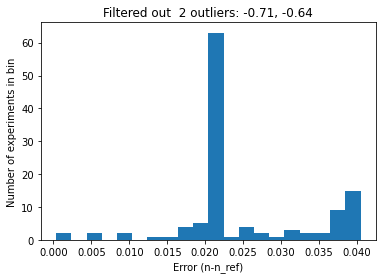

In [89]:

limit = 0.2
D1_diff_array = [i for i in diff_array.flatten() if -limit < i <limit ]
plt.hist(D1_diff_array, bins=20)
plt.xlabel('Error (n-n_ref)')
plt.ylabel('Number of experiments in bin')
plt.title(f'Filtered out  {len(diff_array.flatten())-len(D1_diff_array)} outliers: {", ".join([f"{i:.2f}" for i in diff_array.flatten() if not (-limit < i <limit)])}')
print('Result: ', np.average(D1_diff_array), '+-', np.std(D1_diff_array), f'(filtered out {len(diff_array.flatten())-len(D1_diff_array)} outliers)')
plt.savefig('results/6ring2_v5/Histogram_narrow_vext-1_COsc.png', dpi=150)

### mu_Hxc distribution

Result:  -0.763650593441649 +- 1.6468242290476254 (filtered out 6 outliers)


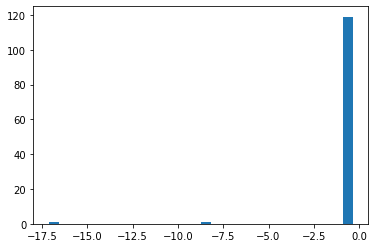

In [90]:
D1_mu_hxc_0 = np.array(mu_hxc_0).flatten()
# D1_diff_array = [i for i in D1_diff_array if -0.2 < i < .2]
plt.hist(D1_mu_hxc_0, bins=30)
print('Result: ', np.average(D1_mu_hxc_0), '+-', np.std(D1_mu_hxc_0), '(filtered out 6 outliers)')

Result:  -0.5637063192870674 +- 0.05534682922693623 2 outliers: -17.13, -8.19


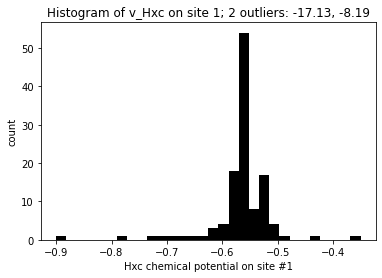

In [104]:
D1_mu_hxc_0 = np.array(mu_hxc_0).flatten()
limit = 2
D1_mu_hxc_0 = [i for i in D1_mu_hxc_0 if -limit < i < limit]
plt.hist(D1_mu_hxc_0, bins=30, color='k')
plt.xlabel("Hxc chemical potential on site #1")
plt.ylabel('count')
string1 = f'{len(np.array(mu_hxc_0).flatten())-len(D1_mu_hxc_0)} outliers: {", ".join([f"{i:.2f}" for i in np.array(mu_hxc_0).flatten() if not (-limit < i <limit)])}'
plt.title(f'Histogram of v_Hxc on site 1; '+string1)
print('Result: ', np.average(D1_mu_hxc_0), '+-', np.std(D1_mu_hxc_0),string1)
plt.savefig('results/6ring2_v5/Histogram_v-Hxc-0_vext-1_COsc.png', dpi=150)

Result:  -0.41049495531238434 +- 0.0656249363899794 2 outliers: -1.16, -1.79


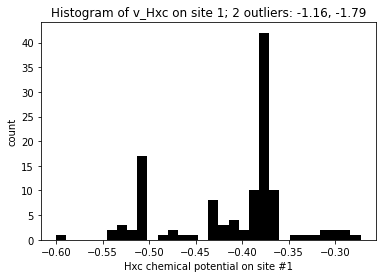

In [105]:
D1_mu_hxc_1 = np.array(mu_hxc_1).flatten()
limit = 1
D1_mu_hxc_1 = [i for i in D1_mu_hxc_1 if -limit < i < limit]
plt.hist(D1_mu_hxc_1, bins=30, color='k')
plt.xlabel("Hxc chemical potential on site #1")
plt.ylabel('count')
string1 = f'{len(np.array(mu_hxc_1).flatten())-len(D1_mu_hxc_1)} outliers: {", ".join([f"{i:.2f}" for i in np.array(mu_hxc_1).flatten() if not (-limit < i <limit)])}'
plt.title(f'Histogram of v_Hxc on site 1; '+string1)
print('Result: ', np.average(D1_mu_hxc_1), '+-', np.std(D1_mu_hxc_1),string1)
plt.savefig('results/6ring2_v5/Histogram_v-Hxc-1_vext-1_COsc.png', dpi=150)

Yaay it looks like the simulation converged all the time even though some of the simulations look to give wrong results (2 out of 121). 
